### Import libraries and data

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [60]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,1/11/22,1/12/22,1/13/22,1/14/22,1/15/22,1/16/22,1/17/22,1/18/22,1/19/22,1/20/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,158471,158511,158602,158639,158678,158717,158826,158974,159070,159303
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,222664,224569,226598,228777,230940,232637,233654,236486,239129,241512
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,223196,223806,224383,224979,225484,226057,226749,227559,228918,230470
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,28542,28899,28899,29888,29888,29888,29888,29888,29888,32201
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,91148,91907,92581,93302,93524,93694,93974,94275,94779,95220


In [61]:
deaths_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,1/11/22,1/12/22,1/13/22,1/14/22,1/15/22,1/16/22,1/17/22,1/18/22,1/19/22,1/20/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7374,7376,7376,7376,7378,7379,7381,7383,7386,7386
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3247,3253,3255,3262,3265,3269,3271,3277,3283,3286
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6363,6372,6383,6393,6404,6412,6423,6435,6443,6453
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,141,141,141,142,142,142,142,142,142,144
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1840,1842,1847,1852,1857,1863,1866,1870,1877,1881


In [62]:
# Filter for Canada data
confirmed_canada_df = confirmed_df.loc[confirmed_df['Country/Region']=='Canada'].reset_index(drop=True)
confirmed_canada_df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,1/11/22,1/12/22,1/13/22,1/14/22,1/15/22,1/16/22,1/17/22,1/18/22,1/19/22,1/20/22
0,Alberta,Canada,53.9333,-116.5765,0,0,0,0,0,0,...,417533,424322,430332,436495,436495,436495,452381,455660,459497,463024
1,British Columbia,Canada,53.7267,-127.6476,0,0,0,0,0,0,...,286080,288692,291246,293521,293521,293521,299146,301178,303565,305715
2,Diamond Princess,Canada,0.0000,0.0000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Grand Princess,Canada,0.0000,0.0000,0,0,0,0,0,0,...,13,13,13,13,13,13,13,13,13,13
4,Manitoba,Canada,53.7609,-98.8139,0,0,0,0,0,0,...,103935,105406,106627,107838,107838,107838,110593,111432,112346,113196
5,New Brunswick,Canada,46.5653,-66.4619,0,0,0,0,0,0,...,20890,21249,21553,21979,22388,22768,23173,23503,24001,24489
6,Newfoundland and Labrador,Canada,53.1355,-57.6604,0,0,0,0,0,0,...,10201,10931,11617,12092,12092,12092,13032,13327,13838,14198
7,Northwest Territories,Canada,64.8255,-124.8457,0,0,0,0,0,0,...,3322,3467,3587,3741,3741,3741,4055,4234,4372,4508
8,Nova Scotia,Canada,44.6820,-63.7443,0,0,0,0,0,0,...,26741,27357,28194,28736,28736,28736,30950,31445,31860,32387
9,Nunavut,Canada,70.2998,-83.1076,0,0,0,0,0,0,...,1033,1036,1048,1055,1055,1055,1195,1222,1242,1242


In [103]:
deaths_canada_df = deaths_df.loc[deaths_df['Country/Region']=='Canada'].reset_index(drop=True)
deaths_canada_df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,1/11/22,1/12/22,1/13/22,1/14/22,1/15/22,1/16/22,1/17/22,1/18/22,1/19/22,1/20/22
0,Alberta,Canada,53.9333,-116.5765,0,0,0,0,0,0,...,3352,3367,3375,3380,3380,3380,3403,3412,3413,3421
1,British Columbia,Canada,53.7267,-127.6476,0,0,0,0,0,0,...,2449,2455,2462,2468,2468,2468,2490,2492,2505,2520
2,Diamond Princess,Canada,0.0000,0.0000,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
3,Grand Princess,Canada,0.0000,0.0000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Manitoba,Canada,53.7609,-98.8139,0,0,0,0,0,0,...,1426,1429,1438,1443,1443,1443,1463,1466,1478,1485
5,New Brunswick,Canada,46.5653,-66.4619,0,0,0,0,0,0,...,173,174,178,182,183,187,189,192,196,199
6,Newfoundland and Labrador,Canada,53.1355,-57.6604,0,0,0,0,0,0,...,23,23,23,24,24,24,26,28,28,30
7,Northwest Territories,Canada,64.8255,-124.8457,0,0,0,0,0,0,...,12,12,12,12,12,12,13,13,13,13
8,Nova Scotia,Canada,44.6820,-63.7443,0,0,0,0,0,0,...,114,115,117,117,117,117,117,121,122,124
9,Nunavut,Canada,70.2998,-83.1076,0,0,0,0,0,0,...,4,4,4,4,4,4,4,5,5,5


In [64]:
confirmed_canada_df.shape, deaths_canada_df.shape

((16, 734), (16, 734))

In [172]:
confirmed_canada_df.dtypes

Province/State     object
Country/Region     object
Lat               float64
Long              float64
1/22/20             int64
                   ...   
1/16/22             int64
1/17/22             int64
1/18/22             int64
1/19/22             int64
1/20/22             int64
Length: 734, dtype: object

In [173]:
deaths_canada_df.dtypes

Province/State     object
Country/Region     object
Lat               float64
Long              float64
1/22/20             int64
                   ...   
1/16/22             int64
1/17/22             int64
1/18/22             int64
1/19/22             int64
1/20/22             int64
Length: 734, dtype: object

In [186]:
# Check for null values
confirmed_canada_df.isna().sum()>0

Province/State    False
Country/Region    False
Lat                True
Long               True
1/22/20           False
                  ...  
1/16/22           False
1/17/22           False
1/18/22           False
1/19/22           False
1/20/22           False
Length: 734, dtype: bool

In [187]:
confirmed_canada_df.columns[confirmed_canada_df.isna().sum()>0]

Index(['Lat', 'Long'], dtype='object')

In [188]:
deaths_canada_df.columns[deaths_canada_df.isna().sum()>0]

Index(['Lat', 'Long'], dtype='object')

Only `Latitude` and `Longitude` columns for Repatriated Travellers have null values. This row is not a province and it will automatically get eliminated when we filter for top provinces based on death. Hence no futher processing needed.

In [138]:
# old
def calculate_values(confirmed_df):
        
    # Remove unnecessary columns
    confirmed_df = confirmed_df.iloc[:, 4:]
    
    # convert wide data into long
    confirmed_df = confirmed_df.melt(var_name='Date', value_name='num_cases')
    
    # Convert to date type and set as index
    confirmed_df['Date'] = pd.to_datetime(confirmed_df['Date'])
    confirmed_df.set_index('Date', inplace=True)
    
    # Compute daily new cases
    confirmed_df['daily_new_cases'] = confirmed_df['num_cases'].diff()
    confirmed_df.iloc[0, 1] = confirmed_df.iloc[0, 0] # replace nan in first row
    
    # weekly moving average
    confirmed_df['new_cases_ma_7'] = confirmed_df.daily_new_cases.rolling(7, min_periods=1).mean()
    
    # monthly moving average
    confirmed_df['new_cases_ma_30'] = confirmed_df.daily_new_cases.rolling(30, min_periods=1).mean()
    
    # Exponential weighted moving average
    confirmed_df['new_cases_ewm'] = confirmed_df.daily_new_cases.ewm(alpha=0.3, adjust=False).mean()
    
    return confirmed_df

In [192]:
def calculate_features(df, df_type):
        
    # Remove unnecessary columns
    df = df.iloc[:, 4:]
    
    # convert wide data into long
    value_col_name = 'num_'+ df_type
    df = df.melt(var_name='Date', value_name=value_col_name)
    
    # Convert to date type and set as index
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    
    # Compute daily new cases
    daily_col = 'daily_' + df_type
    df[daily_col] = df[value_col_name].diff()
    df.iloc[0, 1] = df.iloc[0, 0] # replace nan in first row
    
    # weekly moving average
    col_name = df_type + '_ma_7'
    df[col_name] = df[daily_col].rolling(7, min_periods=1).mean()
    
    # monthly moving average
    col_name = df_type + '_ma_30'
    df[col_name] = df[daily_col].rolling(30, min_periods=1).mean()
    
    # Exponential weighted moving average
    col_name = df_type + '_ewm'
    df[col_name] = df[daily_col].ewm(alpha=0.3, adjust=False).mean()
    
    return df

In [193]:
# Top 10 provinces based on number of deaths
deaths_top_df = deaths_canada_df.sort_values(by=deaths_canada_df.columns[-1], ascending=False)[:10]
deaths_top_df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,1/11/22,1/12/22,1/13/22,1/14/22,1/15/22,1/16/22,1/17/22,1/18/22,1/19/22,1/20/22
12,Quebec,Canada,52.9399,-73.5491,0,0,0,0,0,0,...,12028,12080,12125,12193,12289,12310,12364,12453,12541,12639
10,Ontario,Canada,51.2538,-85.3232,0,0,0,0,0,0,...,10459,10511,10548,10600,10622,10650,10702,10702,10702,10702
0,Alberta,Canada,53.9333,-116.5765,0,0,0,0,0,0,...,3352,3367,3375,3380,3380,3380,3403,3412,3413,3421
1,British Columbia,Canada,53.7267,-127.6476,0,0,0,0,0,0,...,2449,2455,2462,2468,2468,2468,2490,2492,2505,2520
4,Manitoba,Canada,53.7609,-98.8139,0,0,0,0,0,0,...,1426,1429,1438,1443,1443,1443,1463,1466,1478,1485
14,Saskatchewan,Canada,52.9399,-106.4509,0,0,0,0,0,0,...,961,961,961,961,961,961,961,961,961,961
5,New Brunswick,Canada,46.5653,-66.4619,0,0,0,0,0,0,...,173,174,178,182,183,187,189,192,196,199
8,Nova Scotia,Canada,44.6820,-63.7443,0,0,0,0,0,0,...,114,115,117,117,117,117,117,121,122,124
6,Newfoundland and Labrador,Canada,53.1355,-57.6604,0,0,0,0,0,0,...,23,23,23,24,24,24,26,28,28,30
15,Yukon,Canada,64.2823,-135.0000,0,0,0,0,0,0,...,15,15,15,15,15,15,15,15,15,15


In [206]:
deaths_top_df.iloc[:, [0, -1]].to_csv('../data/processed/top_provinces.csv', index=False)

In [200]:

for province in deaths_top_df['Province/State']:
    
    # Extract confirmed cases for the specific province
    province_confirmed_df = confirmed_canada_df.loc[confirmed_canada_df['Province/State']==province]

    # Feature engineering
    summary_confirmed = calculate_features(province_confirmed_df, "new_cases")
    
    # Extract death info for the specific province
    province_deaths_df = deaths_canada_df.loc[confirmed_canada_df['Province/State']==province]
    
    # Feature engineering
    summary_deaths = calculate_features(province_deaths_df, "deaths")
    
    # Combine confirmed cases df and deaths df
    province_combined = summary_confirmed.join(summary_deaths)
    
    # perform necessary data cleaning
    province_combined.loc[province_combined['daily_new_cases']<0, 'daily_new_cases'] = 0
    province_combined.loc[province_combined['daily_deaths']<0, 'daily_deaths'] = 0
    
    # calculate mortality rate
    province_combined['mortality_rate'] = province_combined['daily_deaths'] / province_combined['daily_new_cases']
    province_combined['mortality_rate'].fillna(value=0, inplace=True)
    
    province_combined['province'] = province
    # Write province combined df into csv file
    file_name = province + '_combined.csv'
    province_combined.to_csv('../data/processed/' + file_name)
    

### A sample wrangled data frame for province British Columbia

In [203]:
bc_df = pd.read_csv('../data/processed/British Columbia_combined.csv', parse_dates=['Date'], index_col='Date')
bc_df.tail()

,num_new_cases,daily_new_cases,new_cases_ma_7,new_cases_ma_30,new_cases_ewm,num_deaths,daily_deaths,deaths_ma_7,deaths_ma_30,deaths_ewm,mortality_rate,province
Date,,,,,,,,,,,,
2022-01-16,293521,0.0,2378.000000,2257.866667,1293.988351,2468,0.0,4.142857,2.300000,2.590714,0.000000,British Columbia
2022-01-17,299146,5625.0,2186.428571,2445.366667,2593.291845,2490,22.0,6.285714,3.033333,8.413500,0.003911,British Columbia
2022-01-18,301178,2032.0,2156.857143,2513.100000,2424.904292,2492,2.0,6.142857,3.100000,6.489450,0.000984,British Columbia
2022-01-19,303565,2387.0,2124.714286,2507.666667,2413.533004,2505,13.0,7.142857,3.433333,8.442615,0.005446,British Columbia
2022-01-20,305715,2150.0,2067.000000,2535.733333,2334.473103,2520,15.0,8.285714,3.900000,10.409830,0.006977,British Columbia


### Summary
* Covid confirmed cases and death data for Canada is filted out and stored.
* Null values are present only for  Repatriated Travellers. This row will eventually get eliminated when we filter for top 10 provinces based on number of deaths. So no treatment of null values needed.

**Feature Engineering**
* For each province, a separate data frame is created and wide data frame is melted into long data frame to form time series data. Then the following features are extracted.
    * Number of daily deaths and confirmed cases
    * 7 day and 30 day moving average of confirmed cases and deaths
    * To filter out noise and to identify trends, exponential weighted moving average is calculated for confirmed cases and deaths.
    * Moratality rate is calculated as ratio of number of deaths to number of confirmed cases
    * Few errors in number of cases and deaths reported (present day number lower than previous day number) led to negative values for number of new cases. These are replaced with zero as number of new cases/deaths for that day.
    * The time series data created is written as csv file for further EDA and creation of dashboard in Tableau.

In [195]:

from numpy import array
 
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
    # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)
 
# define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# summarize the data
for i in range(len(X)):
    print(X[i], y[i])

[10 20 30] 40
[20 30 40] 50
[30 40 50] 60
[40 50 60] 70
[50 60 70] 80
[60 70 80] 90


In [199]:
# univariate lstm example
from numpy import array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
    # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

# define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=200, verbose=0)
# demonstrate prediction
x_input = array([70, 80, 90])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
[[102.075195]]


In [148]:
#print(province)
#confirmed_df = confirmed_canada_df.loc[confirmed_canada_df['Province/State']==province]

#for province in deaths_top_df['Province/State']:
province = deaths_top_df['Province/State'][0]
province_confirmed_df = confirmed_canada_df.loc[confirmed_canada_df['Province/State']==province]

summary_confirmed = calculate_values(province_confirmed_df, "new_cases")
summary_confirmed

,num_new_cases,daily_new_cases,new_cases_ma_7,new_cases_ma_30,new_cases_ewm
Date,,,,,
2020-01-22,0,0.0,0.000000,0.000000,0.000000
2020-01-23,0,0.0,0.000000,0.000000,0.000000
2020-01-24,0,0.0,0.000000,0.000000,0.000000
2020-01-25,0,0.0,0.000000,0.000000,0.000000
2020-01-26,0,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...
2022-01-16,436495,0.0,5891.857143,3182.400000,3098.206664
2022-01-17,452381,15886.0,5650.285714,3711.933333,6934.544665
2022-01-18,455660,3279.0,5446.714286,3821.233333,5837.881266


In [149]:
province_deaths_df = deaths_canada_df.loc[confirmed_canada_df['Province/State']==province]
summary_deaths = calculate_values(province_deaths_df, "deaths")
summary_deaths

,num_deaths,daily_deaths,deaths_ma_7,deaths_ma_30,deaths_ewm
Date,,,,,
2020-01-22,0,0.0,0.000000,0.000000,0.000000
2020-01-23,0,0.0,0.000000,0.000000,0.000000
2020-01-24,0,0.0,0.000000,0.000000,0.000000
2020-01-25,0,0.0,0.000000,0.000000,0.000000
2020-01-26,0,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...
2022-01-16,3380,0.0,6.000000,3.133333,3.424290
2022-01-17,3403,23.0,8.428571,3.900000,9.297003
2022-01-18,3412,9.0,8.571429,4.200000,9.207902


In [163]:
province_combined = summary_confirmed.join(summary_deaths)
province_combined.loc[province_combined['daily_new_cases']<0, 'daily_new_cases'] = 0
province_combined.loc[province_combined['daily_deaths']<0, 'daily_deaths'] = 0
province_combined['mortality_rate'] = province_combined['daily_deaths'] / province_combined['daily_new_cases']
province_combined['mortality_rate'].fillna(value=0, inplace=True)

In [165]:
province_combined

,num_new_cases,daily_new_cases,new_cases_ma_7,new_cases_ma_30,new_cases_ewm,num_deaths,daily_deaths,deaths_ma_7,deaths_ma_30,deaths_ewm,mortality_rate
Date,,,,,,,,,,,
2020-01-22,0,0.0,0.000000,0.000000,0.000000,0,0.0,0.000000,0.000000,0.000000,0.000000
2020-01-23,0,0.0,0.000000,0.000000,0.000000,0,0.0,0.000000,0.000000,0.000000,0.000000
2020-01-24,0,0.0,0.000000,0.000000,0.000000,0,0.0,0.000000,0.000000,0.000000,0.000000
2020-01-25,0,0.0,0.000000,0.000000,0.000000,0,0.0,0.000000,0.000000,0.000000,0.000000
2020-01-26,0,0.0,0.000000,0.000000,0.000000,0,0.0,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
2022-01-16,436495,0.0,5891.857143,3182.400000,3098.206664,3380,0.0,6.000000,3.133333,3.424290,0.000000
2022-01-17,452381,15886.0,5650.285714,3711.933333,6934.544665,3403,23.0,8.428571,3.900000,9.297003,0.001448
2022-01-18,455660,3279.0,5446.714286,3821.233333,5837.881266,3412,9.0,8.571429,4.200000,9.207902,0.002745


In [171]:
file_name = province + '_combined.csv'
province_combined.to_csv('../data/processed/' + file_name)

'Alberta_combined.csv'

In [158]:
province_combined.loc[province_combined['mortality_rate']<0]

,num_new_cases,daily_new_cases,new_cases_ma_7,new_cases_ma_30,new_cases_ewm,num_deaths,daily_deaths,deaths_ma_7,deaths_ma_30,deaths_ewm,mortality_rate
Date,,,,,,,,,,,
2020-03-25,358,-1.0,37.285714,11.933333,31.548167,2,1.0,0.285714,0.066667,0.350421,-1.000000
2020-06-11,7316,40.0,32.142857,32.366667,36.248747,149,-2.0,0.428571,1.033333,0.073760,-0.050000
2020-07-11,8596,0.0,48.142857,42.666667,39.372303,160,-1.0,0.714286,0.366667,0.401531,-inf
2021-04-27,184840,1539.0,1615.571429,1283.333333,1542.873082,2067,-7.0,2.714286,2.800000,1.290557,-0.004548
2021-06-22,231476,57.0,110.142857,242.700000,92.069024,2290,-2.0,2.285714,3.800000,1.264183,-0.035088
2021-08-06,236010,369.0,245.000000,122.466667,315.803740,2325,-4.0,-0.428571,0.600000,-0.880428,-0.010840
2021-12-09,338141,333.0,299.714286,347.866667,340.089561,3271,-1.0,2.000000,3.733333,2.161861,-0.003003
2021-12-16,340470,473.0,332.714286,335.033333,401.350117,3285,-1.0,2.000000,2.800000,2.028033,-0.002114


In [159]:
province_combined['2020-03-22':'2020-03-26']

,num_new_cases,daily_new_cases,new_cases_ma_7,new_cases_ma_30,new_cases_ewm,num_deaths,daily_deaths,deaths_ma_7,deaths_ma_30,deaths_ewm,mortality_rate
Date,,,,,,,,,,,
2020-03-22,259,64.0,31.428571,8.633333,39.341596,1,0.0,0.142857,0.033333,0.147000,0.0
2020-03-23,301,42.0,35.000000,10.033333,40.139117,1,0.0,0.142857,0.033333,0.102900,0.0
2020-03-24,359,58.0,40.714286,11.966667,45.497382,1,0.0,0.142857,0.033333,0.072030,0.0
2020-03-25,358,-1.0,37.285714,11.933333,31.548167,2,1.0,0.285714,0.066667,0.350421,-1.0
2020-03-26,486,128.0,52.428571,16.200000,60.483717,2,0.0,0.285714,0.066667,0.245295,0.0


In [125]:
province = 'British Columbia'

confirmed_bc_df = confirmed_canada_df.loc[confirmed_canada_df['Province/State']==province]

# Remove unnecessary columns
confirmed_bc_df = confirmed_bc_df.iloc[:, 4:]

# convert wide data into long
confirmed_bc_df = confirmed_bc_df.melt(var_name='Date', value_name='num_cases')
confirmed_bc_df.dtypes

Date         object
num_cases     int64
dtype: object

In [126]:
confirmed_bc_df['Date'] = pd.to_datetime(confirmed_bc_df['Date'])
confirmed_bc_df.dtypes

Date         datetime64[ns]
num_cases             int64
dtype: object

In [106]:
confirmed_bc_df.set_index('Date', inplace=True)

In [127]:
confirmed_bc_df

,Date,num_cases
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0
...,...,...
725,2022-01-16,293521
726,2022-01-17,299146
727,2022-01-18,301178
728,2022-01-19,303565


In [129]:
confirmed_bc_df['daily_new_cases'] = confirmed_bc_df['num_cases'].diff()
confirmed_bc_df

,Date,num_cases,daily_new_cases
0,2020-01-22,0,NaN
1,2020-01-23,0,0.0
2,2020-01-24,0,0.0
3,2020-01-25,0,0.0
4,2020-01-26,0,0.0
...,...,...,...
725,2022-01-16,293521,0.0
726,2022-01-17,299146,5625.0
727,2022-01-18,301178,2032.0
728,2022-01-19,303565,2387.0


In [ ]:
confirmed_bc_df.iloc[0, ]

In [107]:
confirmed_bc_df['daily_new_cases'] = confirmed_bc_df.diff()
confirmed_bc_df.iloc[0, 1] = confirmed_bc_df.iloc[0, 0]
confirmed_bc_df

,num_cases,daily_new_cases
Date,,
2020-01-22,0,0.0
2020-01-23,0,0.0
2020-01-24,0,0.0
2020-01-25,0,0.0
2020-01-26,0,0.0
...,...,...
2022-01-16,293521,0.0
2022-01-17,299146,5625.0
2022-01-18,301178,2032.0


In [108]:
# weekly moving average
confirmed_bc_df['new_cases_ma_7'] = confirmed_bc_df.daily_new_cases.rolling(7, min_periods=1).mean()
confirmed_bc_df

,num_cases,daily_new_cases,new_cases_ma_7
Date,,,
2020-01-22,0,0.0,0.000000
2020-01-23,0,0.0,0.000000
2020-01-24,0,0.0,0.000000
2020-01-25,0,0.0,0.000000
2020-01-26,0,0.0,0.000000
...,...,...,...
2022-01-16,293521,0.0,2378.000000
2022-01-17,299146,5625.0,2186.428571
2022-01-18,301178,2032.0,2156.857143


<AxesSubplot:xlabel='Date'>

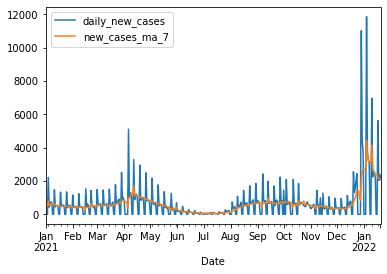

In [110]:
confirmed_bc_df_3 = confirmed_bc_df["2021-01-01":]
confirmed_bc_df_3[['daily_new_cases', 'new_cases_ma_7']].plot()

<AxesSubplot:xlabel='Date'>

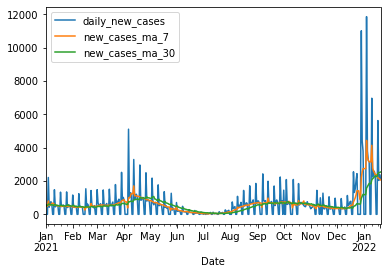

In [111]:
# monthly moving average
confirmed_bc_df['new_cases_ma_30'] = confirmed_bc_df.daily_new_cases.rolling(30, min_periods=1).mean()
confirmed_bc_df_3 = confirmed_bc_df["2021-01-01":]
confirmed_bc_df_3[['daily_new_cases', 'new_cases_ma_7', 'new_cases_ma_30']].plot()

### The Exponential Moving average
The exponential moving average is a widely used method to filter out noise and identify trends. The weight of each element decreases progressively over time, meaning the exponential moving average gives greater weight to recent data points. This is done under the idea that recent data is more relevant than old data. Compared to the simple moving average, the exponential moving average reacts faster to changes, since is more sensitive to recent movements.

<AxesSubplot:xlabel='Date'>

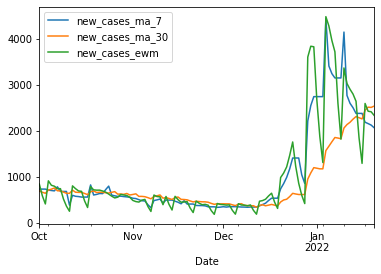

In [116]:
# Exponential weighted moving average
confirmed_bc_df['new_cases_ewm'] = confirmed_bc_df.daily_new_cases.ewm(alpha=0.3, adjust=False).mean()
confirmed_bc_df_3 = confirmed_bc_df["2021-10-01":]
confirmed_bc_df_3[['new_cases_ma_7', 'new_cases_ma_30', 'new_cases_ewm']].plot()

In [114]:
confirmed_bc_df

,num_cases,daily_new_cases,new_cases_ma_7,new_cases_ma_30,new_cases_ewm
Date,,,,,
2020-01-22,0,0.0,0.000000,0.000000,0.000000
2020-01-23,0,0.0,0.000000,0.000000,0.000000
2020-01-24,0,0.0,0.000000,0.000000,0.000000
2020-01-25,0,0.0,0.000000,0.000000,0.000000
2020-01-26,0,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...
2022-01-16,293521,0.0,2378.000000,2257.866667,2134.198342
2022-01-17,299146,5625.0,2186.428571,2445.366667,2483.278508
2022-01-18,301178,2032.0,2156.857143,2513.100000,2438.150657


<AxesSubplot:xlabel='Date'>

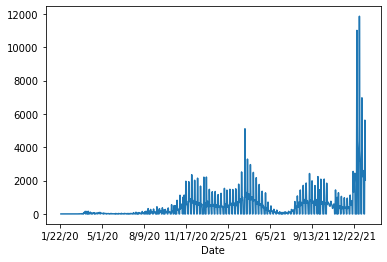

In [58]:
confirmed_bc_df['daily_new_cases'].plot()

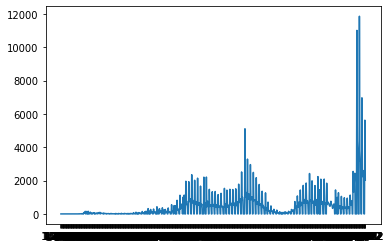

In [50]:
fig, ax = plt.subplots()
ax.plot(confirmed_bc_df.index, confirmed_bc_df.diff())

<AxesSubplot:xlabel='Date'>

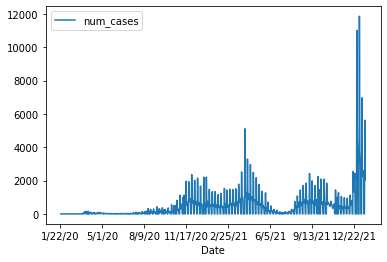

In [49]:
confirmed_bc_df.diff().plot()